In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import accuracy_score

In [3]:
# %run connection.ipynb

In [16]:
data = pd.read_csv('car.csv', index_col=None)
print(data.head())
print(data.info())

  buying maintainance doors persons lug_boot safety  class
0  vhigh        vhigh     2       2    small    low  unacc
1  vhigh        vhigh     2       2    small    med  unacc
2  vhigh        vhigh     2       2    small   high  unacc
3  vhigh        vhigh     2       2      med    low  unacc
4  vhigh        vhigh     2       2      med    med  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maintainance    1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
safety          1728 non-null object
class           1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [17]:
# try:
#     cols = "`,`".join([str(i) for i in data.columns.tolist()])

#     for i,row in data.iterrows():
#         sql = "INSERT INTO `observations` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
#         mycursor.execute(sql, tuple(row))

#         mydb.commit()
# except Exception as e: 
#     print(e)
# else:
#     print('Data Inserted')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying          1728 non-null object
maintainance    1728 non-null object
doors           1728 non-null object
persons         1728 non-null object
lug_boot        1728 non-null object
safety          1728 non-null object
class           1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [19]:
for feature in data.columns:
    print(f'{feature.upper()} >> {data[feature].unique()}')

BUYING >> ['vhigh' 'high' 'med' 'low']
MAINTAINANCE >> ['vhigh' 'high' 'med' 'low']
DOORS >> ['2' '3' '4' '5more']
PERSONS >> ['2' '4' 'more']
LUG_BOOT >> ['small' 'med' 'big']
SAFETY >> ['low' 'med' 'high']
CLASS >> ['unacc' 'acc' 'vgood' 'good']


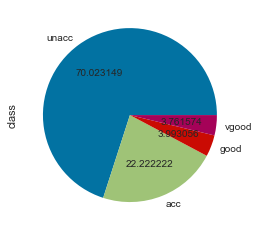

In [21]:
data['class'].value_counts().plot(kind='pie', autopct='%f')

In [25]:
def barplots(col1):
    
    df1 = data.groupby(['class',col1]).size().to_frame('total').reset_index()
    
    plt.figure(figsize=(10,8))
    ax=plt.subplot()
    ax = sns.barplot(data=df1, x=df1[col1], y=df1["total"], hue=df1["class"])
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

    ax.set_title('Distribution of ' +col1+ ' per target variable', fontsize=20)
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1, title='decision')
    return ax

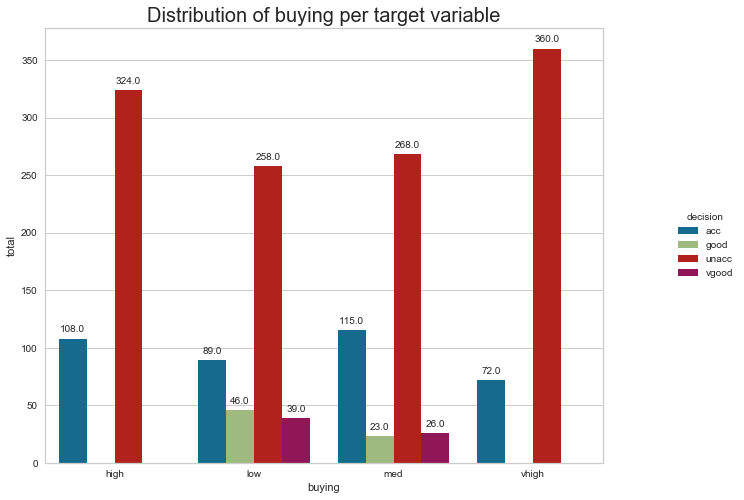

In [26]:
barplots("buying")

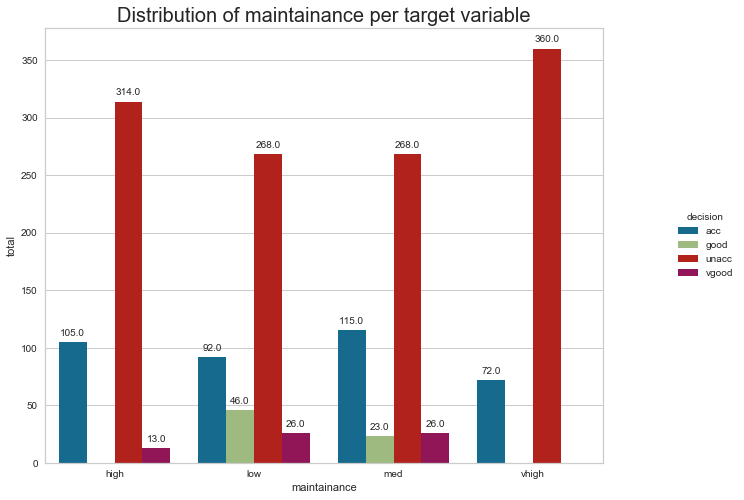

In [27]:
barplots("maintainance")

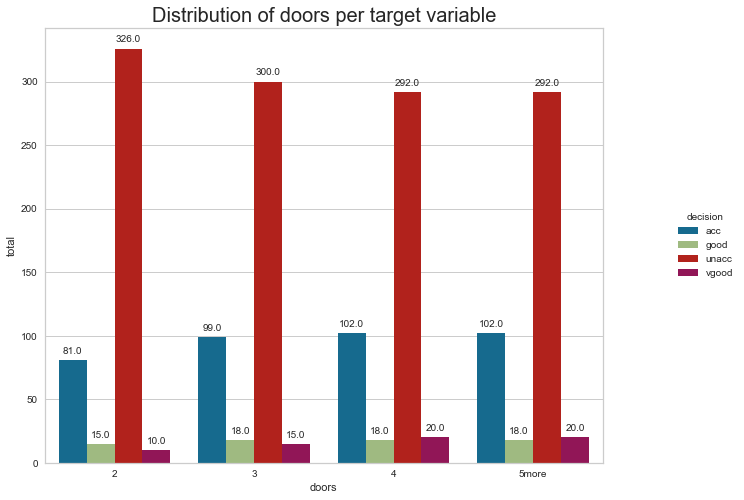

In [28]:
barplots("doors")

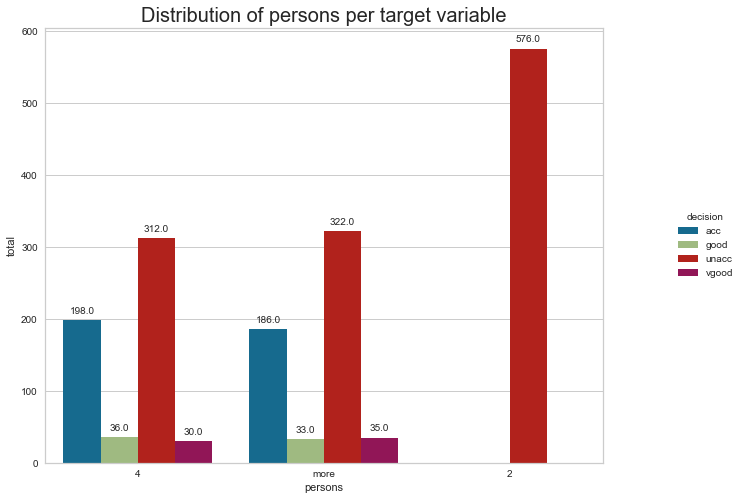

In [29]:
barplots("persons")

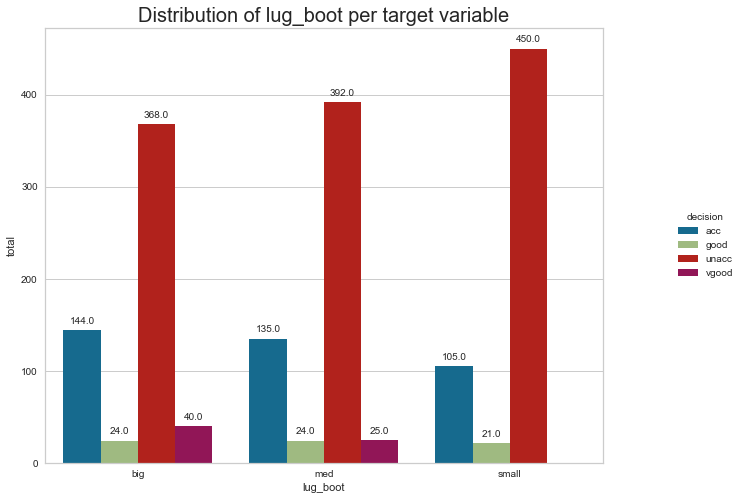

In [30]:
barplots("lug_boot")

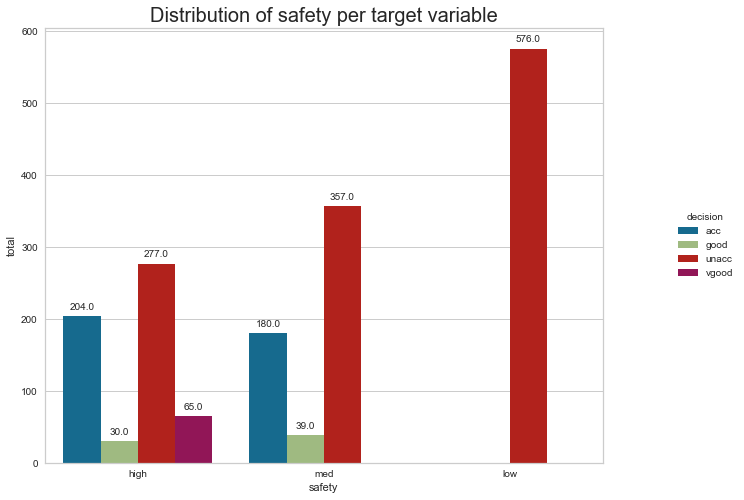

In [31]:
barplots("safety")

In [32]:
# # Overview of the dataset
# fig, saxis = plt.subplots(2, 3,figsize=(16,12))
# data_rating = pd.factorize(data['class'])
# data['class'] = pd.Series(data_rating[0])
# sns.barplot(x = 'buying', y = 'class', data=data, ax = saxis[0,0])
# sns.barplot(x = 'maintainance', y = 'class', data=data, ax = saxis[0,1])
# sns.barplot(x = 'doors', y = 'class', data=data, ax = saxis[0,2])
# sns.barplot(x = 'persons', y = 'class', data=data, ax = saxis[1,0])
# sns.barplot(x = 'lug_boot', y = 'class', data=data, ax = saxis[1,1])
# sns.barplot(x = 'safety', y = 'class', data=data, ax = saxis[1,2])

### Data Preprocessing

In [4]:
le = preprocessing.LabelEncoder()

In [5]:
data['buying'] = le.fit_transform(data['buying'])
data['maintainance'] = le.fit_transform(data['maintainance'])
data['doors'] = le.fit_transform(data['doors'])
data['persons'] = le.fit_transform(data['persons'])
data['lug_boot'] = le.fit_transform(data['lug_boot'])
data['safety'] = le.fit_transform(data['safety'])
data['class'] = le.fit_transform(data['class'])
data

,buying,maintainance,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
df = data.groupby('class').count()
df

,buying,maintainance,doors,persons,lug_boot,safety
class,,,,,,
0,384,384,384,384,384,384
1,69,69,69,69,69,69
2,1210,1210,1210,1210,1210,1210
3,65,65,65,65,65,65


In [7]:

sns.set(rc = {'figure.figsize':(10,8)})
heat_map = sns.heatmap(data.corr(), annot = True)

heat_map.set(title = "\n Correlation matrix For Cars Evaluation\n")

plt.show()

<Figure size 1000x800 with 2 Axes>

In [8]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(x,y, test_size = 0.20, random_state = 10)

### Naive Bayes

In [10]:
gnb = GaussianNB()

In [11]:
pred = gnb.fit(data_train, target_train).predict(data_test)
print(pred.tolist())

[2, 2, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 0, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 0, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 0, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 

In [12]:
#print the accuracy score of the model
print("Naive-Bayes accuracy is : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy is :  0.6820809248554913


## Linear SVC

In [46]:
svc_model = LinearSVC(random_state=0)

In [47]:
pred = svc_model.fit(data_train, target_train).predict(data_test)
print(pred.tolist())

[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [48]:
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.7052023121387283


## K-neighbors classifier

In [40]:
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [41]:
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)

In [42]:
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.9248554913294798


In [19]:
from sklearn import svm

clf = svm.SVC(kernel='linear')

clf.fit(data_train, target_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
pred = clf.predict(data_test)
print(pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [1]:
print("Accuracy:",accuracy_score(target_test, pred))

NameError: name 'accuracy_score' is not defined

### Logistic Regression

In [49]:
model = LogisticRegression()

model.fit(data_train, target_train)

pred = model.predict(data_test)
print(pred)

C:\Users\J4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\J4\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2
 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 0 2
 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [50]:
print("Accuracy: ",accuracy_score(target_test, pred))

Accuracy:  0.708092485549133


C:\Users\J4\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


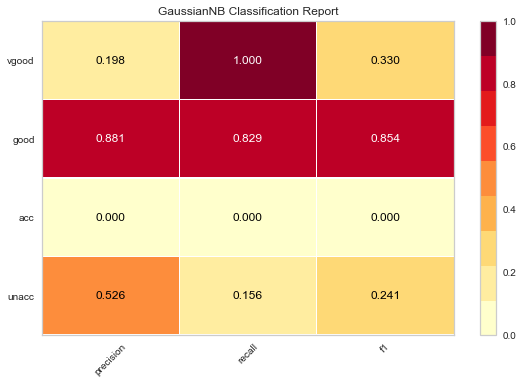

In [52]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(gnb, classes=['unacc','acc', 'good', 'vgood'])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
g = visualizer.poof()

C:\Users\J4\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


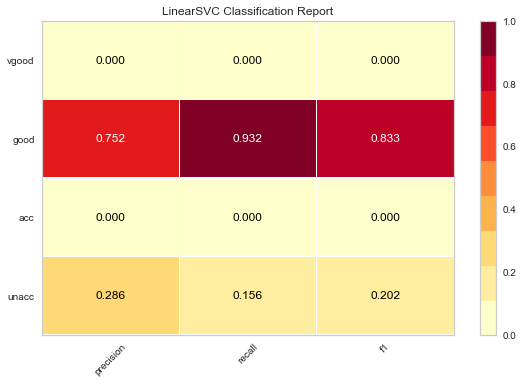

In [53]:
visualizer = ClassificationReport(svc_model, classes=['unacc','acc', 'good', 'vgood'])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
g = visualizer.poof() 

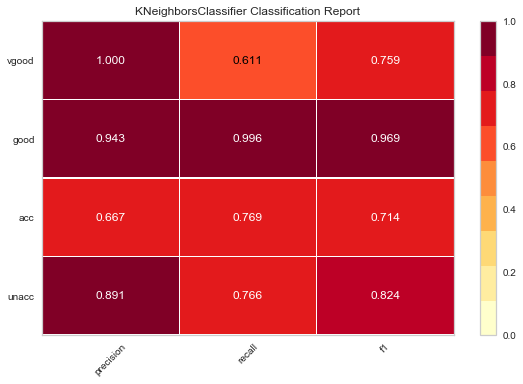

In [54]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(neigh, classes=['unacc','acc', 'good', 'vgood'])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
g = visualizer.poof() 

C:\Users\J4\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


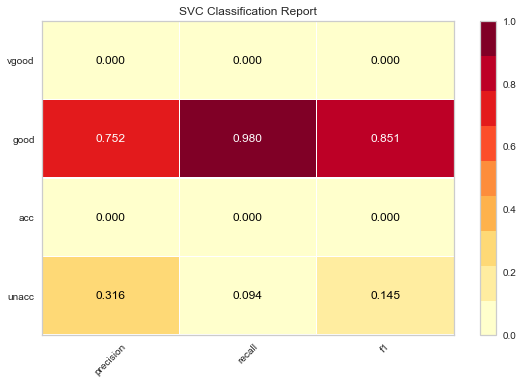

In [55]:
visualizer = ClassificationReport(clf, classes=['unacc','acc', 'good', 'vgood'])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
g = visualizer.poof()

C:\Users\J4\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


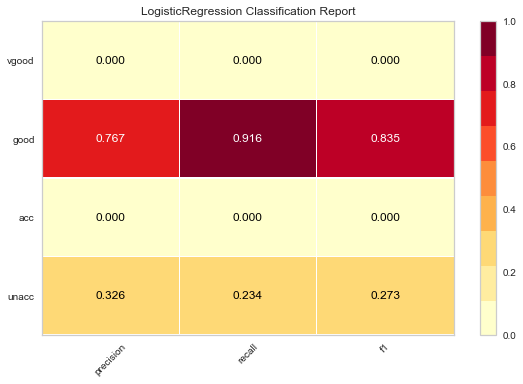

In [56]:
visualizer = ClassificationReport(model, classes=['unacc','acc', 'good', 'vgood'])
visualizer.fit(data_train, target_train) 
visualizer.score(data_test, target_test) 
g = visualizer.poof()